In [16]:
## Import liabraries
!pip install kneed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

In [27]:
## read the data 
def read_data():
    data= sns.load_dataset('iris')
    return data
data=read_data()
df=data.copy()

In [37]:
## import other liabraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from math import sqrt

In [29]:
## convert categorical data into numerical data using label encoder
def label_encoding():
    le=LabelEncoder()
    df['Species']=le.fit_transform(df['species'])
    return df['Species']
df['Species']= label_encoding()
df.drop(['species'],axis=1,inplace=True)

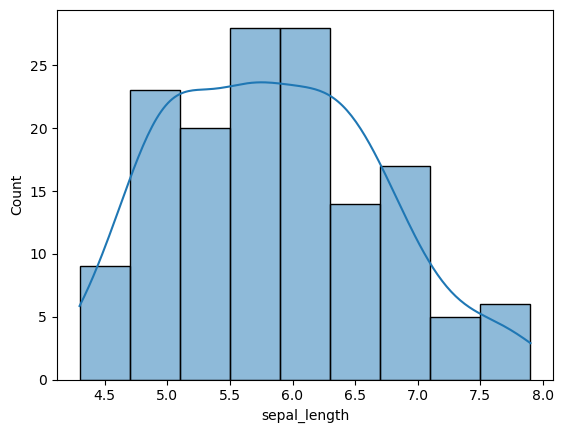

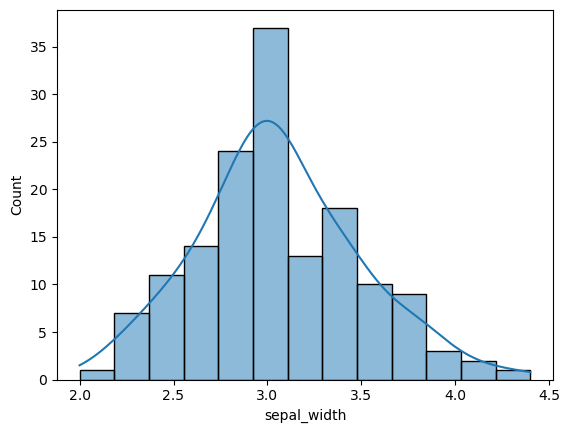

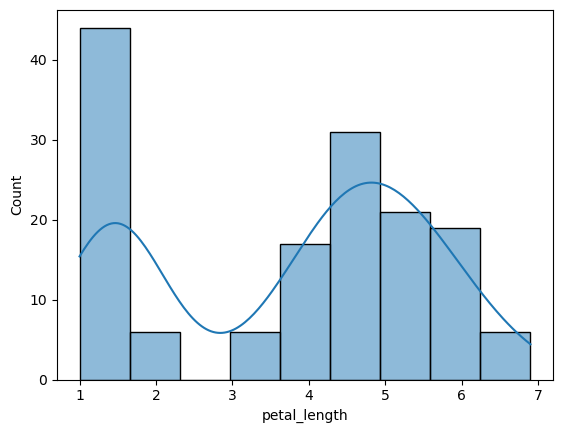

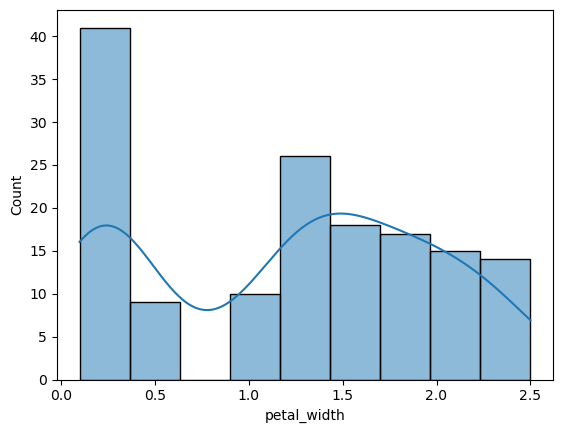

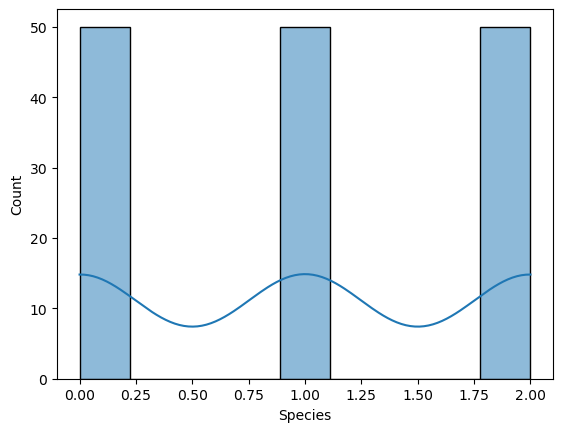

In [36]:
## data distribution 
col=df.columns
for i in col:
    plt.figure()
    sns.histplot(data=df,x=df[i],kde=True)

## above data is not normally distributed, so min max scaler will use for scalling.

In [42]:
x=df.iloc[:,:]
mm_scaler=MinMaxScaler()
mmx = mm_scaler.fit_transform(x)
mmx

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ],
       [0.30555556, 0.79166667, 0.11864407, 0.125     , 0.        ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333, 0.        ],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667, 0.        ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.45833333, 0.08474576, 0.        , 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667, 0.        ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667, 0.        ],
       [0.13888889, 0.41666667, 0.06779661, 0.        , 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        , 0.        ],
       [0.41666667, 0.83333333, 0.

In [43]:
## k value (number of cluster) by standard method
k=sqrt(df.shape[0]/2)
k

8.660254037844387

C:\Users\pv11379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pv11379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pv11379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pv11379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

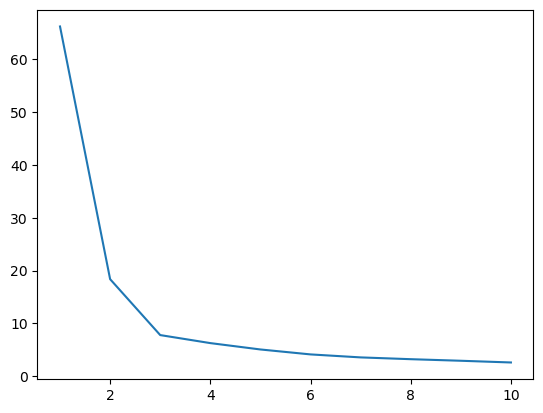

In [44]:
## k value (number of cluster) by elbow method
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(mmx)
    wcss.append(km.inertia_)

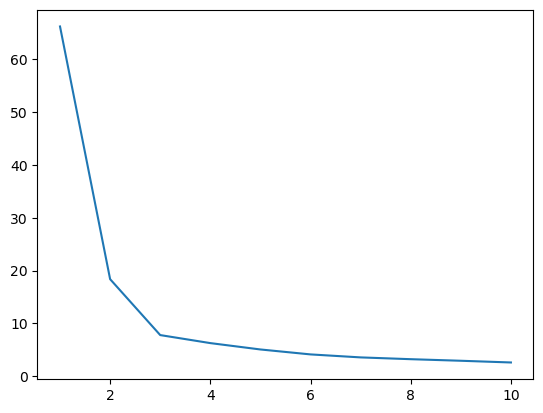

In [45]:
plt.plot(range(1,11),wcss)
plt.show()

## K values (number of custers) will be 3 as per elbow method.

In [48]:
## use kneed package for auto detect of k
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

## 3 no's of clusters are match.

In [69]:
## Model building
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=123)
kmeans.fit(mmx)
df['clusters']=kmeans.predict(mmx)
df

C:\Users\pv11379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pv11379\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,Species,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0
